In [6]:
import sys
import random
import string
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

import dataloader
import util
import autoencoderdual

Loaded training data x (60000, 28, 28, 1) and y (60000, 128) and y_labels (60000,)
Loaded testing data x (10000, 28, 28, 1) and y (10000, 128) and y_labels (10000,)


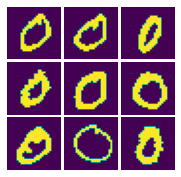

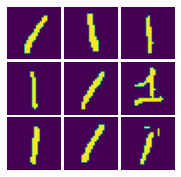

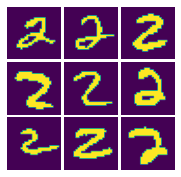

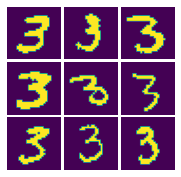

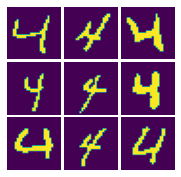

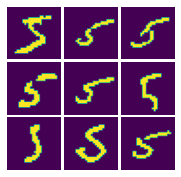

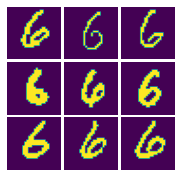

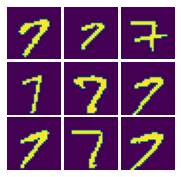

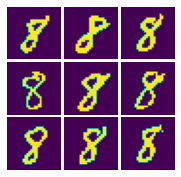

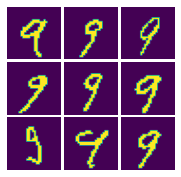

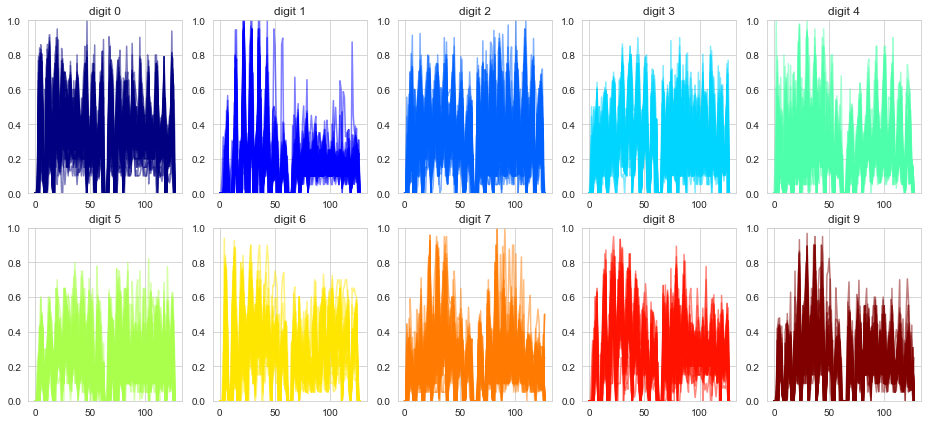

In [2]:
#to retrain or not to retrain
#load = False
load = True

#load data
dataset = dataloader.DataLoader(verbose=True)
x_train, x_test, y_train, y_test, y_reg_train, y_reg_test = dataset.load_data()

#visualize first 9 samples of input images/data based on class labels, within the training dataset
unique_labels, label_counts = np.unique(y_train, return_counts=True)
for label in unique_labels:
    x_train_perlabel = x_train[np.squeeze(y_train) == label]
    fig = util.plot_tile(x_train_perlabel[0:9, :, :])

fig = util.plot_signals(y_reg_train, y_train)
fig.savefig('readme/signals.png')

In [3]:
#load trained architecture, to retrain set "load=False", ~1hr on NVIDIA RTX2080Ti
LSI = autoencoderdual.Autoencoder(x_train, y_reg_train)
LSI.train_autoencoder_dual(epoch=200, load=load)









__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 100)          12900       input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 100)          0           dense_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 80)           8080        leaky_re_lu_1[0][0]              
__________________________________________________________________________________________________
le


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
enc (Conv2D)                 (None, 28, 28, 4)         40        
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 28, 28, 4)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 8)         520       
_________________________________________________________________
batch_normalization_3 (Batch (None, 14, 14, 8)         32        
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 14, 14, 8)         0         
_________

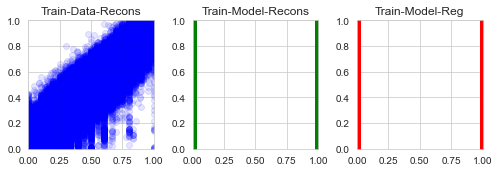

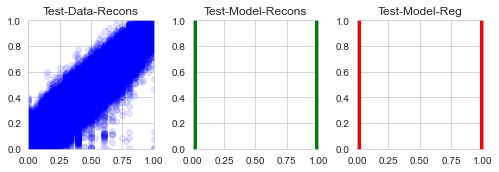

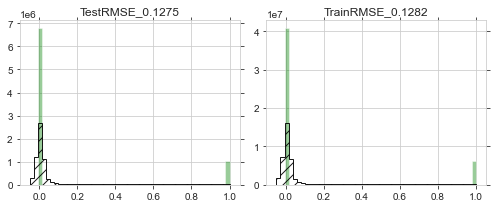

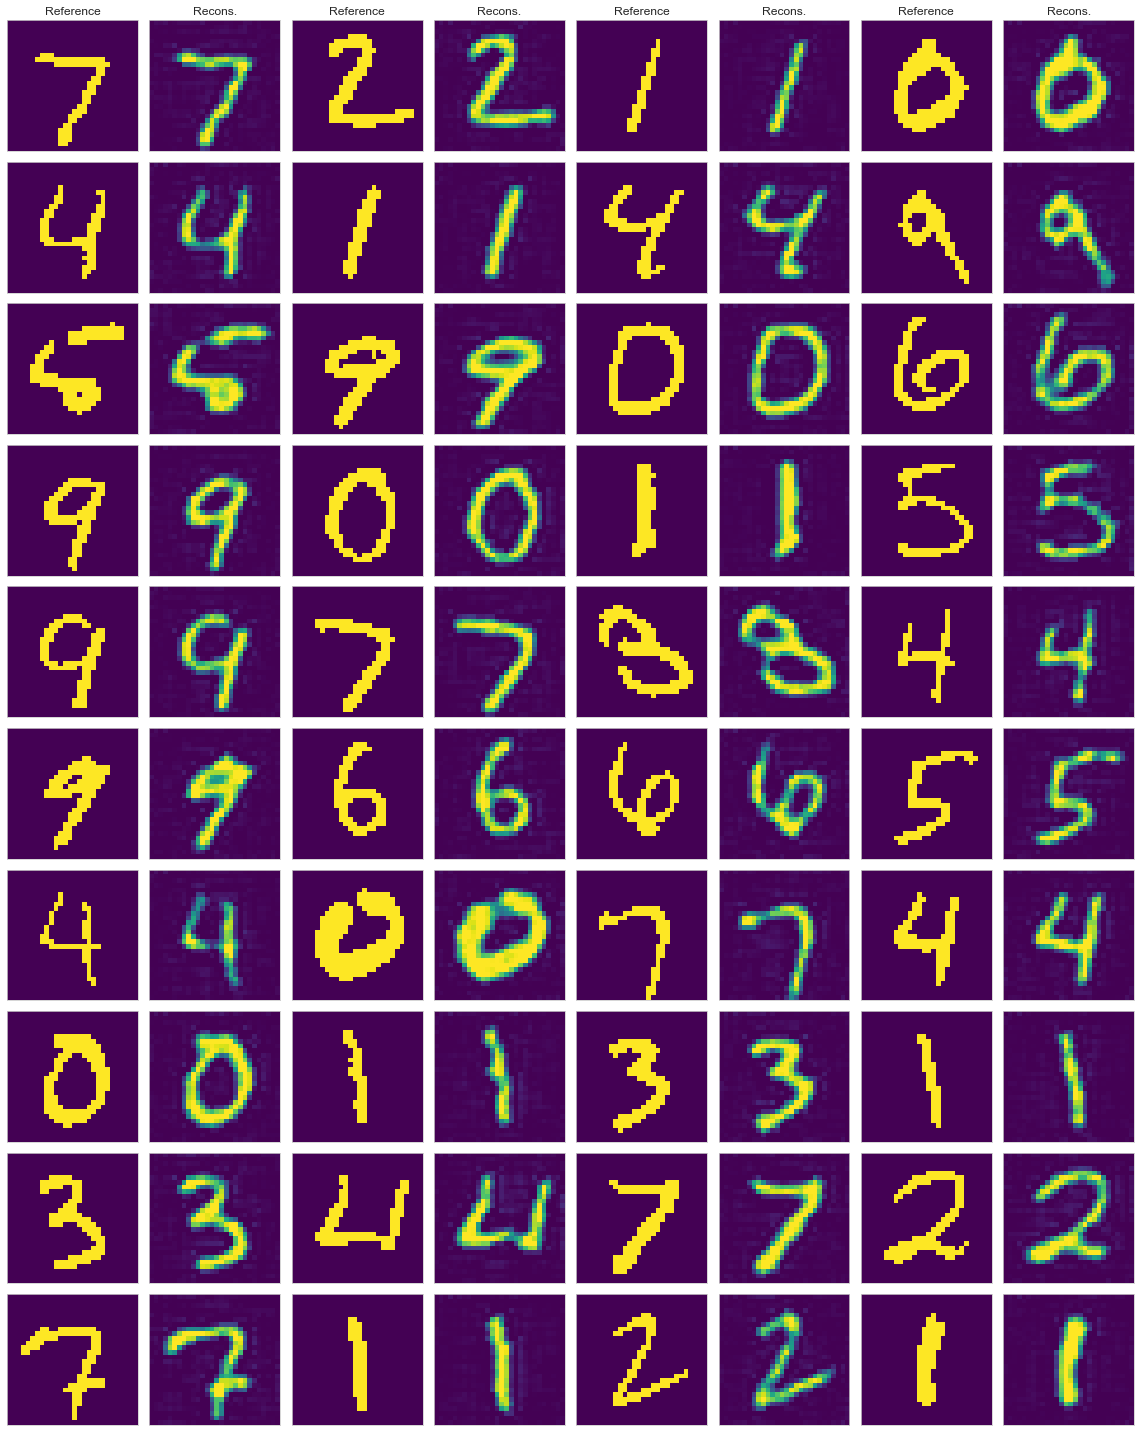

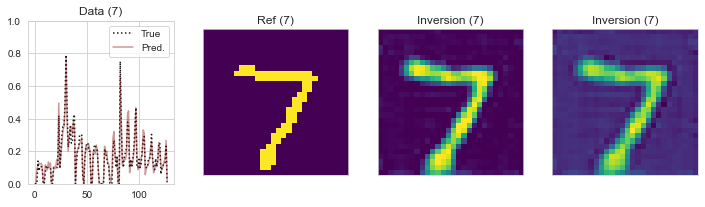

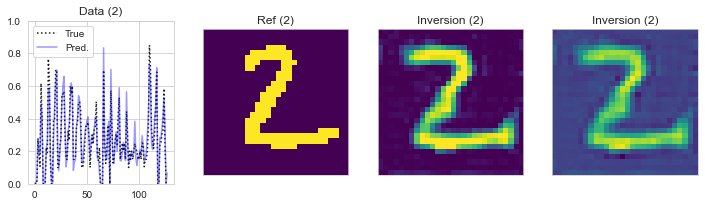

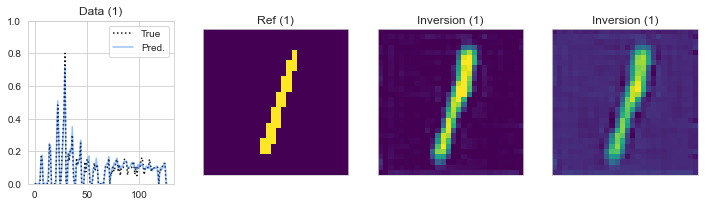

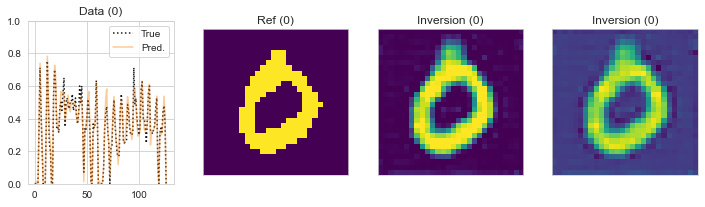

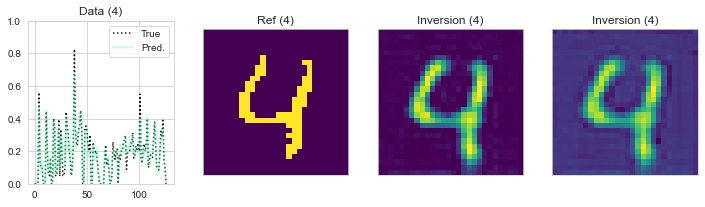

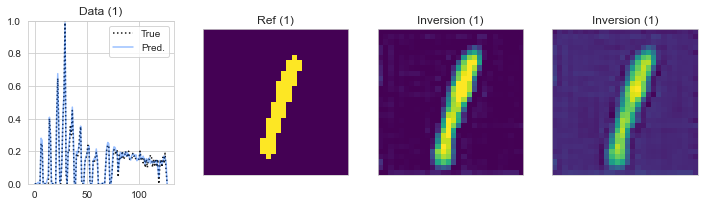

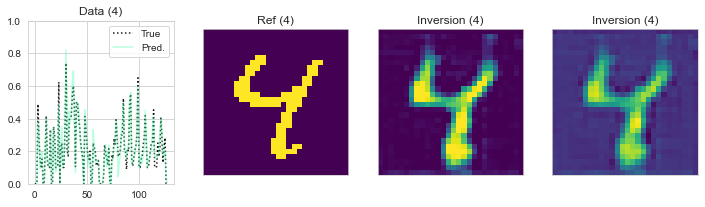

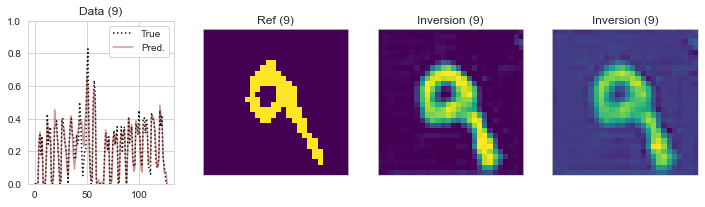

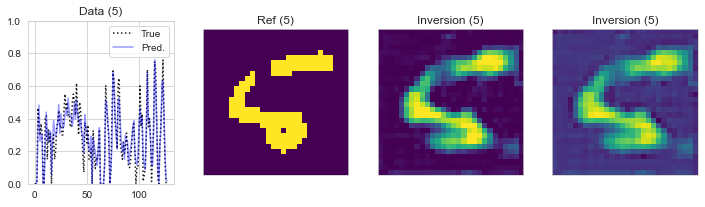

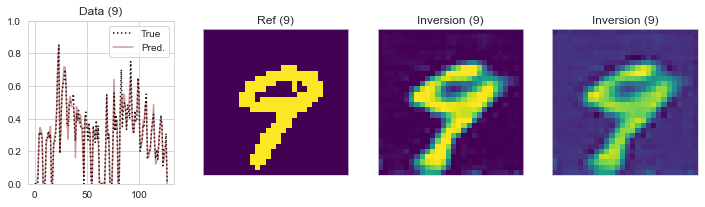

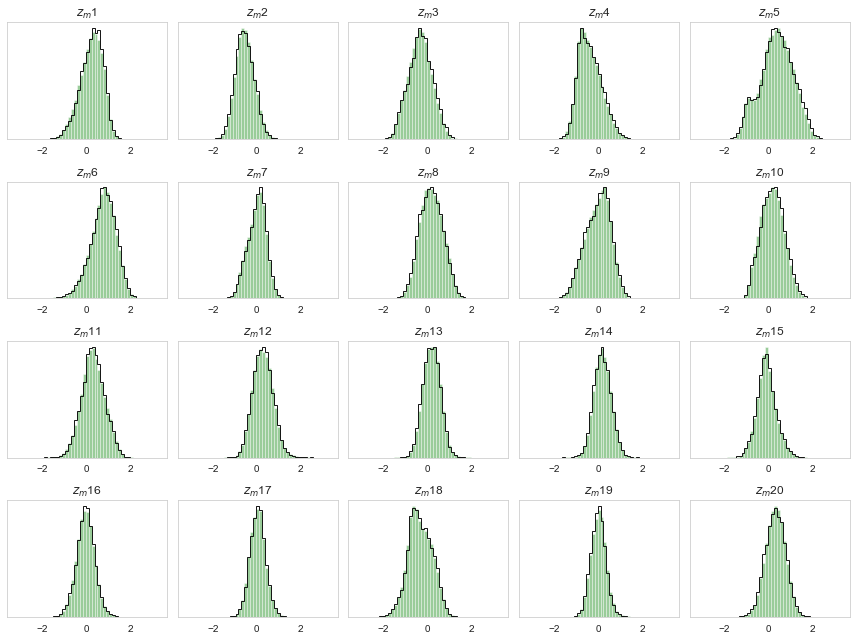

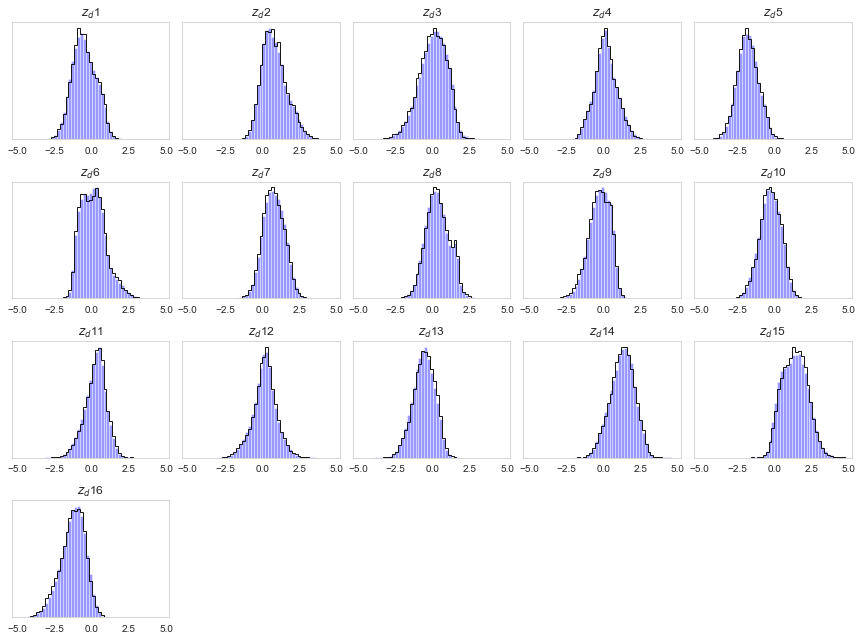

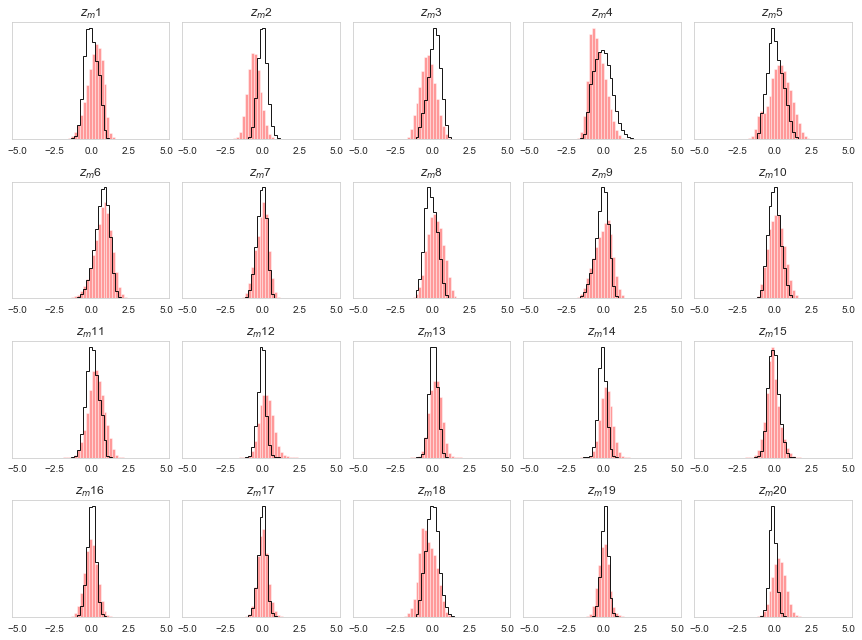

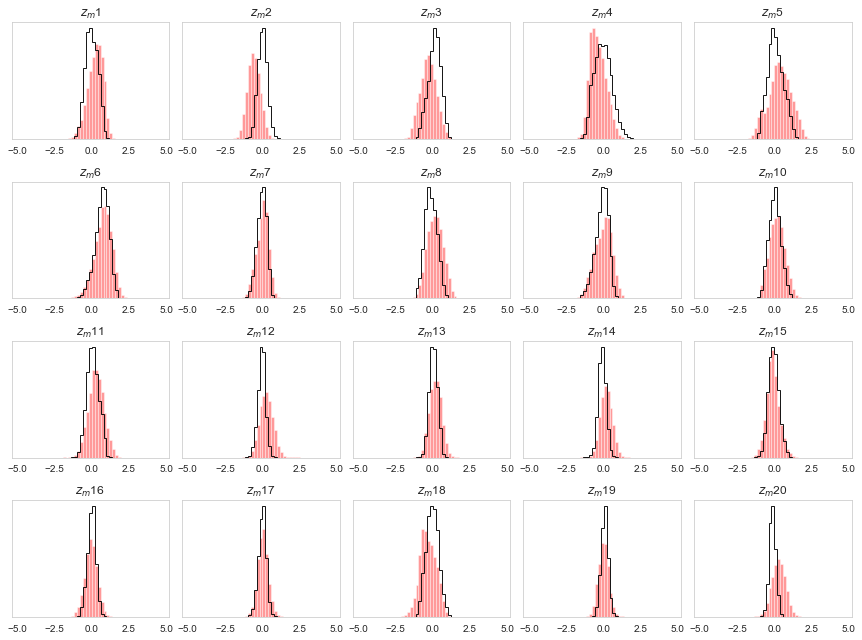

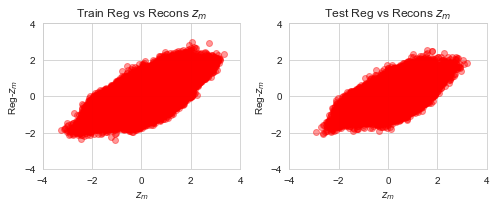

In [4]:
autoencoderdual.inspect_LSI(LSI, x_test, y_reg_test, y_test)
autoencoderdual.inspect_LSI_z(LSI, x_test, y_reg_test, y_test)

In [5]:
print("QC complete")

QC complete
